# Random Forest Classifier

will be a different form of classification. 

In [1]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('cleaned_data.csv')
clustered_data = pd.read_csv('cluster_labels.csv')
df.head()

,Year,Customer Age,Customer Gender,Product Category,Quantity,Unit Price,Profit Margin,Age Group,Quarter
0,2016,29,F,Accessories,1,109.000000,0.266055,25-34,Q1
1,2016,29,F,Clothing,2,28.500000,0.140351,25-34,Q1
2,2016,29,F,Accessories,3,5.000000,0.266667,25-34,Q1
3,2016,29,F,Accessories,2,116.500000,0.248927,25-34,Q1
4,2016,29,F,Accessories,3,41.666667,0.160000,25-34,Q1


In [3]:
clustered_data.head()

,index,Date,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Revenue,Cluster
0,0,02/19/16,F,United States,Washington,Accessories,Tires and Tubes,1.0,109.0,4
1,1,02/20/16,F,United States,Washington,Clothing,Gloves,2.0,57.0,7
2,2,02/27/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,15.0,7
3,3,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,2.0,233.0,7
4,4,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,125.0,7


In [4]:
#hot encoding
cluster_encoded_data = pd.get_dummies(clustered_data, columns=['Cluster', 'Country', 'State', 'Customer Gender', 'Product Category', 'Sub Category'], drop_first=True)
cluster_encoded_data.head()

,index,Date,Quantity,Revenue,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,0,02/19/16,1.0,109.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,02/20/16,2.0,57.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,02/27/16,3.0,15.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,03/12/16,2.0,233.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,03/12/16,3.0,125.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [8]:
# Step 1: Prepare the data
# Selecting features and target variable
mer_1 = pd.concat([df[['Customer Age', 'Quantity', 'Unit Price', 'Profit Margin']], clustered_data[['Revenue']]], axis=1)
# X = df[['Customer Age', 'Quantity','Unit Price', 'Profit Margin']]
X = mer_1 #features
y = clustered_data['Cluster']  # Assuming 'Revenue' is the target variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7846286205907657
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      1033
           1       0.80      0.82      0.81       690
           2       0.78      0.74      0.76       437
           3       0.77      0.83      0.80       953
           4       0.78      0.80      0.79       805
           5       0.74      0.66      0.69       729
           6       0.76      0.73      0.75       768
           7       0.80      0.84      0.82      1260
           8       0.96      0.97      0.96       299

    accuracy                           0.78      6974
   macro avg       0.80      0.79      0.79      6974
weighted avg       0.78      0.78      0.78      6974



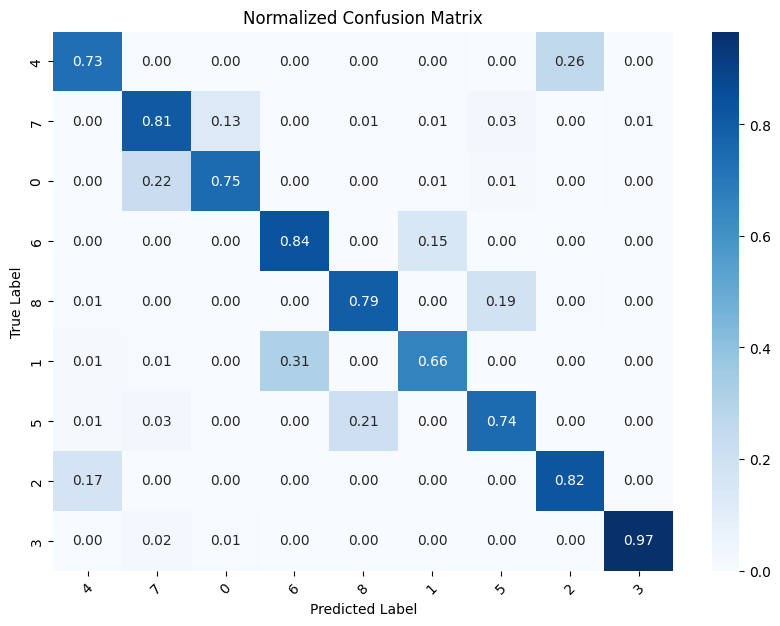

In [6]:
#visualize the classification report
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels = clustered_data['Cluster'].unique()

# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

In [13]:
# print(df.columns)
print(cluster_encoded_data.columns)

Index(['index', 'Date', 'Quantity', 'Revenue', 'Cluster_1', 'Cluster_2',
       'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7',
       'Cluster_8', 'Country_Germany', 'Country_United Kingdom',
       'Country_United States', 'State_Arizona', 'State_Bayern',
       'State_Brandenburg', 'State_California', 'State_Charente-Maritime',
       'State_England', 'State_Essonne', 'State_Florida',
       'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg',
       'State_Hauts de Seine', 'State_Hessen', 'State_Illinois',
       'State_Kentucky', 'State_Loir et Cher', 'State_Loiret',
       'State_Massachusetts', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York',
       'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina',
       'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somm

In [16]:
#another feature selection
safe1 = pd.concat([df[['Customer Age']], cluster_encoded_data[['Customer Gender_M','Sub Category_Road Bikes', 'Sub Category_Tires and Tubes']]], axis=1)
X2 = pd.concat([safe1, cluster_encoded_data[['State_Arizona', 'State_Bayern',
       'State_Brandenburg', 'State_California', 'State_Charente-Maritime',
       'State_England', 'State_Essonne', 'State_Florida',
       'State_Garonne (Haute)', 'State_Georgia', 'State_Hamburg',
       'State_Hauts de Seine', 'State_Hessen', 'State_Illinois',
       'State_Kentucky', 'State_Loir et Cher', 'State_Loiret',
       'State_Massachusetts', 'State_Minnesota', 'State_Mississippi',
       'State_Missouri', 'State_Montana', 'State_Moselle', 'State_New York',
       'State_Nord', 'State_Nordrhein-Westfalen', 'State_North Carolina',
       'State_Ohio', 'State_Oregon', 'State_Pas de Calais', 'State_Saarland',
       'State_Seine (Paris)', 'State_Seine Saint Denis',
       'State_Seine et Marne', 'State_Somme', 'State_South Carolina',
       'State_Texas', 'State_Utah',
       'State_Virginia', 'State_Washington', 'State_Wyoming', 'State_Yveline']]], axis=1)
y2 = clustered_data['Cluster']  # Assuming 'Revenue' is the target variable
# Step 2: Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Step 3: Train the model
rf_model2 = RandomForestClassifier(random_state=42)
# Handle missing values in X2
X2 = X2.fillna(0)  # Replace NaN values with 0 (or use another strategy like mean or median)

# Train the model
rf_model2.fit(X2_train, y2_train)
# Step 4: Evaluate the model
y2_pred = rf_model2.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))
#visualize the classification report

Accuracy: 0.3062804703183252
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.36      0.33      1033
           1       0.22      0.15      0.18       690
           2       0.25      0.15      0.19       437
           3       0.37      0.59      0.45       953
           4       0.23      0.16      0.19       805
           5       0.28      0.24      0.26       729
           6       0.24      0.13      0.17       768
           7       0.34      0.50      0.40      1260
           8       0.11      0.02      0.04       299

    accuracy                           0.31      6974
   macro avg       0.26      0.26      0.25      6974
weighted avg       0.28      0.31      0.28      6974



Feature ranking:
1. feature 0 (0.846407)
2. feature 1 (0.026144)
3. feature 2 (0.021015)
4. feature 3 (0.014929)
5. feature 9 (0.005821)
6. feature 7 (0.005201)
7. feature 29 (0.004951)
8. feature 34 (0.004812)
9. feature 32 (0.004787)
10. feature 28 (0.004751)
11. feature 16 (0.004661)
12. feature 43 (0.004659)
13. feature 35 (0.004296)
14. feature 36 (0.004247)
15. feature 5 (0.004053)
16. feature 45 (0.003944)
17. feature 10 (0.003898)
18. feature 14 (0.003855)
19. feature 15 (0.003817)
20. feature 37 (0.003035)
21. feature 26 (0.002632)
22. feature 20 (0.002398)
23. feature 12 (0.002377)
24. feature 6 (0.002290)
25. feature 8 (0.001794)
26. feature 38 (0.001506)
27. feature 19 (0.001462)
28. feature 33 (0.001222)
29. feature 40 (0.000837)
30. feature 17 (0.000807)
31. feature 31 (0.000753)
32. feature 27 (0.000657)
33. feature 11 (0.000356)
34. feature 39 (0.000290)
35. feature 41 (0.000280)
36. feature 44 (0.000271)
37. feature 30 (0.000207)
38. feature 22 (0.000111)
39. feature 1

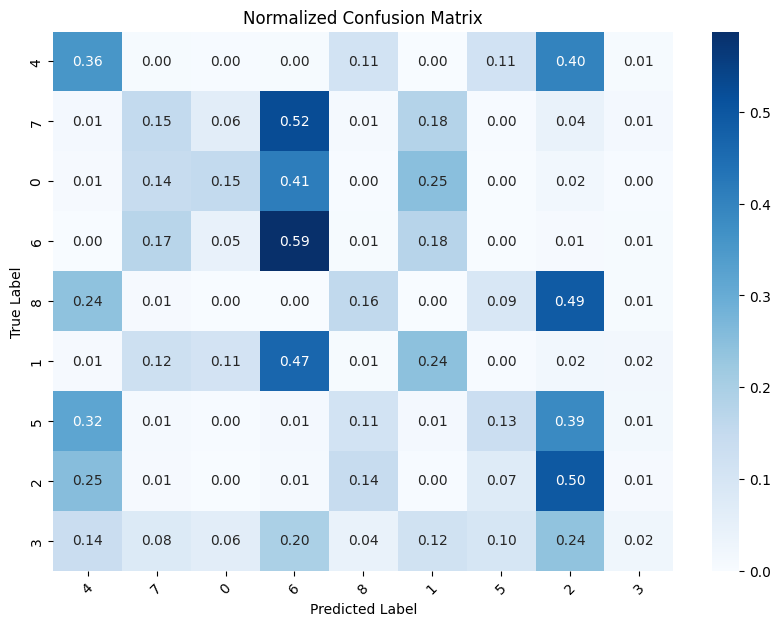

In [ ]:
#Feature Importance
importances = rf_model2.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#make a confusion matrix
cm2 = confusion_matrix(y2_test, y2_pred)
# Normalize the confusion matrix
cm2_normalized = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels2 = clustered_data['Cluster'].unique()
# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm2_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels2, yticklabels=unique_labels2)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()
